In [13]:
import pandas as pd

board_games = pd.read_csv('board_games.csv')
board_games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [14]:
board_games = board_games.dropna()
board_games = board_games[board_games['users_rated'] != 0]
board_games.shape

(56894, 20)

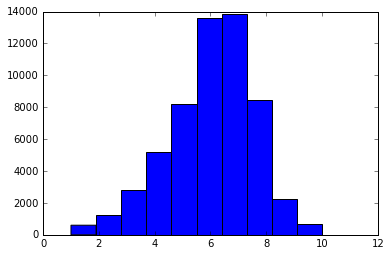

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(board_games['average_rating'])
plt.show()

In [16]:
mean = np.mean(board_games['average_rating'])
print(mean)

std = np.std(board_games['average_rating'])
print(std)

6.016112849333889
1.5788160595839211


As the data is continuous and the histogram represents a normal distribution, the error metric should be mean_squared_error.

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5, random_state=1)

numeric_columns = board_games.columns[3:]
model.fit(board_games[numeric_columns])
labels = model.labels_
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
game_mean = board_games[numeric_columns].apply(np.mean, axis=1)
game_std = board_games[numeric_columns].apply(np.std, axis=1)

plt.scatter(x=game_mean, y=game_std, c=labels, marker='o')
plt.legend(labels)
plt.show()

In [ ]:
correlations = board_games[numeric_columns].corr()
correlations['average_rating']

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
y = board_games['average_rating']
predictors = list(board_games.columns[3:])
predictors.remove('bayes_average_rating')
predictors.remove('average_rating')
x = board_games[predictors]

reg.fit(x, y)
predictions = reg.predict(x)
predictions

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, predictions)
mse

1. In the below code, i am training 80% of the data and then testing it on the remaining 20% of the data.
   The error = 3.82

2. If i train all of the data except the last row and then predict just the last rows average rating, the error        comes out to be 0.84

3. In the above code, we are training the model with the entire dataset and then predicting the entire dataset. In    that case the error comes out to be 2.09

For predicting data which the model wasn't trained on, the error rate is greater than the data it was trained on.

In [ ]:
t = board_games[:45515]
train = t[predictors]
test = board_games[45515:][predictors]

y_train = t['average_rating']
y_test = board_games[45515:]['average_rating']

lr = LinearRegression()
lr.fit(train, y_train)

pred = lr.predict(test)
pred

m = mean_squared_error(y_test, pred)
m